In [1]:
import pygor3 as p3
import numpy as np

In [9]:
mdl = p3.IgorModel.load_default("human", "tcr_beta")

Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------


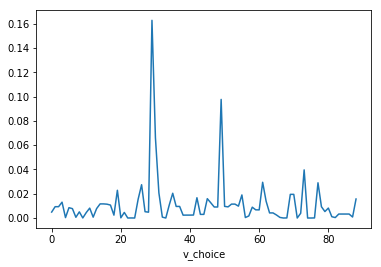

In [14]:
mdl.Pmarginal['v_choice'].plot()

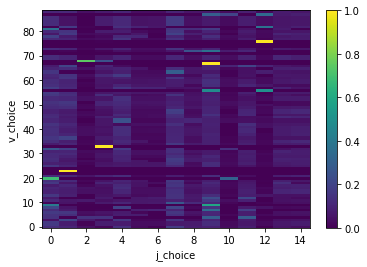

In [12]:
mdl.xdata['j_choice'].plot()

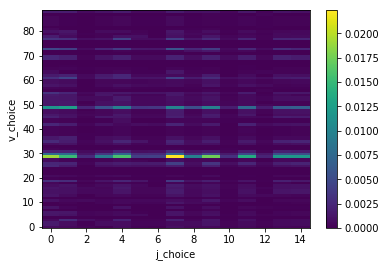

In [13]:
da = mdl.xdata['j_choice']*mdl.Pmarginal['v_choice']
da.plot()

In [107]:
# calculate information content of P(V,J)
# H2(V,J) =  <-Log2(P(V,J))>
minus_log_da = -np.log2(da)

In [109]:
minus_log_da #.plot()

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[10.635909, 10.942017, 12.281727, ...,       inf, 11.897358, 12.420675],
       [ 9.334533, 10.40759 , 13.203494, ..., 12.089647, 10.690412, 10.489293],
       [ 9.334443, 10.406869, 13.203119, ..., 12.094045, 10.689949, 10.488663],
       ...,
       [11.268343, 12.649038,       inf, ..., 13.084814, 12.438476, 12.312695],
       [28.309674, 39.109462,       inf, ..., 11.794848, 14.113826, 13.849711],
       [ 9.235441,  9.134395, 10.63124 , ..., 11.500532,  9.800615, 10.103682]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723..92006|284 nt|1| | | | |284+0=284| | |' ... 'U66059|TRBV9*01|Homo sapiens|F|V-REGION|206836..207121|286 nt|1| | | | |286+0=286| | |'
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGGGGAGTAAAAGGACAATGAAACGTGAGCATCTGGGACATGATTCTATGTATTGGTACAGACAGAAA

In [118]:
rrr = np.einsum('vj,vj->vj', da, minus_log_da)
rrr

array([[6.68416342e-03, 5.56188531e-03, 2.46655758e-03, ...,
                   nan, 3.11881002e-03, 2.26542313e-03],
       [1.44583272e-02, 7.66219838e-03, 1.39971945e-03, ...,
        2.77374915e-03, 6.46933670e-03, 7.29716840e-03],
       [1.44590923e-02, 7.66549809e-03, 1.40004381e-03, ...,
        2.76631290e-03, 6.47113347e-03, 7.29991738e-03],
       ...,
       [4.56826019e-03, 1.96932671e-03,            nan, ...,
        1.50607288e-03, 2.24085068e-03, 2.42026294e-03],
       [8.50890867e-08, 6.59417665e-11,            nan, ...,
        3.31962677e-03, 7.96085535e-04, 9.38128486e-04],
       [1.53219078e-02, 1.62537269e-02, 6.70288728e-03, ...,
        3.96929064e-03, 1.09894090e-02, 9.18265489e-03]])

In [122]:
np.nansum(rrr)

8.861998573940156

In [113]:
np.einsum('vj,vj->j', da, minus_log_da)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [114]:
np.einsum('vj,vj->l', da, minus_log_da)

ValueError: einstein sum subscripts string included output subscript 'l' which never appeared in an input

Teste con einsum

In [124]:
np.random.seed(0)
aaa = np.random.randint(1, 3, size=(2,3))
bbb = np.random.randint(1, 6, size=(2,3))
print("aaa =\n", aaa)
print("bbb =\n", bbb)

aaa =
 [[1 2 2]
 [1 2 2]]
bbb =
 [[4 2 4]
 [3 5 1]]


In [95]:
bbb==0

array([[False,  True,  True],
       [False, False, False]])

In [92]:
np.einsum('ij,kj->ik', aaa, bbb==0)

array([[1, 0],
       [3, 0]])

In [93]:
np.einsum('ij,kj->ik', aaa, bbb)

array([[0, 2],
       [4, 8]])

In [97]:
np.einsum('ij,ik->jk', aaa, bbb)

array([[4, 2, 1],
       [8, 2, 1],
       [8, 4, 2]])

In [99]:
np.einsum('ij,ik->jk', aaa, bbb[bbb==0])

ValueError: einstein sum subscripts string contains too many subscripts for operand 1

In [101]:
bbb[bbb==0]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [89]:
# np.einsum('i->', aaa)
np.einsum('ii->', aaa)

ValueError: dimensions in operand 0 for collapsing index 'i' don't match (2 != 3)

In [45]:
np.einsum('ij->', aaa)

3

In [62]:
print(mdl.Pmarginal['v_choice'].dims, da.dims)

('v_choice',) ('v_choice', 'j_choice')


In [70]:
# Como hacer para que las dimensiones sean sumadas usando einsum 
# para hacer las medias 
prod = np.einsum('ij,kj',da, log_da)
prod

array([[       nan, 0.03558526, 0.03558529, ...,        inf,        inf,
        0.03264167],
       [       inf, 0.06728833, 0.06728944, ...,        inf,        inf,
        0.06317142],
       [       inf, 0.06728004, 0.06728115, ...,        inf,        inf,
        0.0631629 ],
       ...,
       [       inf, 0.02389903, 0.0238994 , ...,        nan,        nan,
        0.02213341],
       [       inf, 0.00636137, 0.00636208, ...,        nan,        nan,
        0.00613974],
       [       inf, 0.11511392, 0.11511448, ...,        inf,        inf,
        0.10578856]])

In [73]:
np.diag(prod)

array([       nan, 0.06728833, 0.06728115, 0.08719914,        nan,
       0.06155422,        nan,        nan, 0.03723165,        nan,
       0.03448088, 0.06005324,        nan,        nan, 0.08129589,
       0.08128627, 0.08028124, 0.07470521,        nan, 0.14227387,
              nan,        nan,        nan,        nan,        nan,
       0.1032742 , 0.1687019 , 0.04036803, 0.03724792, 0.70629754,
       0.34907038, 0.13314993,        nan,        nan, 0.07591976,
       0.13026835, 0.06727306, 0.06725726,        nan,        nan,
              nan,        nan, 0.10970418, 0.02445466, 0.02445482,
       0.10617193, 0.08618468, 0.06478694, 0.06432627, 0.47712627,
       0.06874712, 0.06540638, 0.08075931, 0.08075017, 0.06927854,
       0.12304986, 0.0034269 , 0.01476954, 0.06468852, 0.05116298,
       0.05071908, 0.17865823, 0.09280215, 0.0323649 , 0.03236482,
       0.02113104,        nan,        nan,        nan, 0.12616775,
       0.12616369,        nan, 0.0287463 , 0.22814679,        

In [75]:
np.diag(prod).sum()

nan

In [76]:
A_np = np.array([[0,1,1],[1,0,1],[1,1,0]])
B_np = np.array([[1,1,1],[1,1,1],[1,1,1]])

In [85]:
C_np = np.einsum('ij,jk->ik', B_np, A_np==0)
C_np

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [86]:
C_np = np.einsum('ij,jk->ik', B_np, A_np)
C_np

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

In [125]:
np.einsum('ij,kj',da, log_da)

array([[       nan, 0.05133868, 0.05133871, ...,        inf,        inf,
        0.04709197],
       [       inf, 0.09707654, 0.09707815, ...,        inf,        inf,
        0.0911371 ],
       [       inf, 0.09706458, 0.09706617, ...,        inf,        inf,
        0.0911248 ],
       ...,
       [       inf, 0.03447901, 0.03447954, ...,        nan,        nan,
        0.03193176],
       [       inf, 0.00917751, 0.00917854, ...,        nan,        nan,
        0.00885777],
       [       inf, 0.16607428, 0.16607509, ...,        inf,        inf,
        0.15262064]])

In [127]:
da_v = mdl.Pmarginal['v_choice']
da_v

<xarray.DataArray (v_choice: 89)>
array([4.88741e-03, 9.32369e-03, 9.32259e-03, 1.30320e-02, 3.43430e-04,
       8.50694e-03, 7.71250e-03, 6.12276e-04, 5.06104e-03, 4.59289e-05,
       4.48245e-03, 8.16181e-03, 7.00053e-04, 7.77164e-03, 1.16174e-02,
       1.16158e-02, 1.13872e-02, 1.06555e-02, 2.36870e-03, 2.28368e-02,
       1.56715e-04, 4.58447e-03, 0.00000e+00, 4.88782e-05, 0.00000e+00,
       1.54500e-02, 2.74050e-02, 5.18979e-03, 4.80289e-03, 1.62765e-01,
       6.61229e-02, 2.07174e-02, 7.36226e-04, 2.47846e-37, 1.07472e-02,
       2.03820e-02, 9.53245e-03, 9.53006e-03, 2.35607e-03, 2.39208e-03,
       2.39208e-03, 2.45219e-03, 1.66904e-02, 2.98807e-03, 2.98804e-03,
       1.59156e-02, 1.25468e-02, 9.06711e-03, 9.06936e-03, 9.76534e-02,
       9.57746e-03, 9.17011e-03, 1.14472e-02, 1.14458e-02, 9.77554e-03,
       1.89924e-02, 3.97949e-04, 1.70242e-03, 8.91336e-03, 6.73926e-03,
       6.69167e-03, 2.94257e-02, 1.38534e-02, 4.19227e-03, 4.19275e-03,
       2.48630e-03, 4.83399e-0

In [128]:
-np.log2(da_v)

/home/alfaceor/anaconda3/envs/pygor3/lib/python3.7/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


<xarray.DataArray (v_choice: 89)>
array([  7.676714,   6.744883,   6.745053,   6.261798,  11.507696,   6.877144,
         7.018586,  10.67353 ,   7.62635 ,  14.410238,   7.801497,   6.936895,
        10.480248,   7.007565,   6.427569,   6.427768,   6.456443,   6.552258,
         8.721689,   5.452496,  12.639569,   7.769029,        inf,  14.320449,
              inf,   6.016249,   5.189417,   7.590108,   7.701882,   2.619138,
         3.918706,   5.593013,  10.407564, 121.601896,   6.539895,   5.616561,
         6.712937,   6.713299,   8.729402,   8.707519,   8.707519,   8.671714,
         5.904838,   8.38657 ,   8.386585,   5.973415,   6.316537,   6.785141,
         6.784784,   3.356186,   6.706141,   6.768845,   6.448861,   6.449038,
         6.676608,   5.718434,  11.295129,   9.198197,   6.809815,   7.213194,
         7.223418,   5.086779,   6.173616,   7.898053,   7.897887,   8.651784,
        11.014498,  22.877262,  13.909256,   5.682337,   5.682396,        inf,
         7.996422,

In [131]:
# Now calculate the information content in V
da_v.dot(-np.log2(da_v))

/home/alfaceor/anaconda3/envs/pygor3/lib/python3.7/site-packages/xarray/core/computation.py:561: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


<xarray.DataArray ()>
array(nan)

In [134]:
da_minus_log_v = -np.log2(da_v)
da_minus_log_v

<xarray.DataArray (v_choice: 89)>
array([  7.676714,   6.744883,   6.745053,   6.261798,  11.507696,   6.877144,
         7.018586,  10.67353 ,   7.62635 ,  14.410238,   7.801497,   6.936895,
        10.480248,   7.007565,   6.427569,   6.427768,   6.456443,   6.552258,
         8.721689,   5.452496,  12.639569,   7.769029,        inf,  14.320449,
              inf,   6.016249,   5.189417,   7.590108,   7.701882,   2.619138,
         3.918706,   5.593013,  10.407564, 121.601896,   6.539895,   5.616561,
         6.712937,   6.713299,   8.729402,   8.707519,   8.707519,   8.671714,
         5.904838,   8.38657 ,   8.386585,   5.973415,   6.316537,   6.785141,
         6.784784,   3.356186,   6.706141,   6.768845,   6.448861,   6.449038,
         6.676608,   5.718434,  11.295129,   9.198197,   6.809815,   7.213194,
         7.223418,   5.086779,   6.173616,   7.898053,   7.897887,   8.651784,
        11.014498,  22.877262,  13.909256,   5.682337,   5.682396,        inf,
         7.996422,

In [136]:
np.nansum()

nan

In [137]:
da_v*da_minus_log_v

<xarray.DataArray (v_choice: 89)>
array([3.751925e-02, 6.288720e-02, 6.288137e-02, 8.160375e-02, 3.952088e-03,
       5.850345e-02, 5.413084e-02, 6.535146e-03, 3.859726e-02, 6.618464e-04,
       3.496982e-02, 5.661762e-02, 7.336729e-03, 5.446027e-02, 7.467164e-02,
       7.466366e-02, 7.352081e-02, 6.981758e-02, 2.065906e-02, 1.245176e-01,
       1.980810e-03, 3.561688e-02,          nan, 6.999578e-04,          nan,
       9.295105e-02, 1.422160e-01, 3.939107e-02, 3.699129e-02, 4.263039e-01,
       2.591162e-01, 1.158727e-01, 7.662319e-03, 3.013854e-35, 7.028556e-02,
       1.144767e-01, 6.399074e-02, 6.397814e-02, 2.056708e-02, 2.082908e-02,
       2.082908e-02, 2.126469e-02, 9.855410e-02, 2.505966e-02, 2.505945e-02,
       9.507048e-02, 7.925232e-02, 6.152162e-02, 6.153364e-02, 3.277430e-01,
       6.422780e-02, 6.207106e-02, 7.382141e-02, 7.381440e-02, 6.526745e-02,
       1.086068e-01, 4.494885e-03, 1.565920e-02, 6.069833e-02, 4.861159e-02,
       4.833673e-02, 1.496820e-01, 8.55255

In [138]:
np.nansum(da_v*da_minus_log_v)

5.252905287497761

In [140]:
strEvent = 'j_choice'
da_event_marginal = mdl.Pmarginal[strEvent]
da_h_event = -np.log2(da_event_marginal)
H_event = np.nansum(da_event_marginal*da_h_event)
H_event

3.6869971561803307

In [152]:
strEvent = 'd_3_del'
da_event_marginal = mdl.Pmarginal[strEvent]
da_h_event = -np.log2(da_event_marginal)
H_event = np.nansum(da_event_marginal*da_h_event)
print(H_event, len(da_event_marginal))

3.6601381217508546 21


In [153]:
!pwd

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks


/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data
/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data


In [5]:
!ls

Ajam.db		generated		 modif_ref_genome  sample007.db
Ajam_evaluate	generated_seqs_werr.csv  MyDataTest.sh	   testando.db
Ajam_generated	here_evaluate		 pop_evaluate	   testando.db2
Ajam_output	here_generated		 pop_inference	   testando.dbbbbb
aligns		here_output		 pop_output


In [7]:
%cd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data
!pwd

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data
/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data


In [4]:
import pygor3 as p3
import numpy as np
# Create table of probs

# For each sequence in seq_index
db = p3.IgorSqliteDB.create_db("Ajam.db")
db.gen_IgorBestScenarios_cols_list()
for indx in  db.fetch_IgorIndexedSeq_indexes():
    # aln_data = db.get_IgorAlignment_data_list_By_seq_index('V', indx)
    bs_data_list = db.fetch_IgorBestScenarios_By_seq_index(indx)
    for bs_data in bs_data_list:
        bs = p3.IgorScenario.load_FromSQLRecord(bs_data, db.sql_IgorBestScenarios_cols_name_type_list)
    # Insert normalized probability in new table

In [5]:
print(bs_data[0])

999


In [11]:
print(bs.to_dict())

{'seq_index': 999, 'scenario_rank': 10, 'scenario_proba_cond_seq': 0.025123, 'id_v_choice': 39, 'id_j_choice': 4, 'id_d_gene': 2, 'id_v_3_del': 5, 'id_d_5_del': 12, 'id_d_3_del': 9, 'id_j_5_del': 4, 'id_vd_ins': 8, 'vd_dinucl': [1, 1, 1, 1, 1, 2, 2, 1], 'id_dj_ins': 5, 'dj_dinucl': [0, 0, 2, 1, 1], 'mismatches': [], 'mismatcheslen': 0}


In [13]:
np.zeros((4,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [39]:
import xarray as xr
strEvents_list = ['v_choice', 'j_choice']
strEvents_tuple = tuple(strEvents_list)

# Use model parms to create xarray with values
da_shape_list = [len(mdl.parms.Event_dict[str_event_nickname]) for str_event_nickname in strEvents_list]
da_shape_tuple = tuple(da_shape_list)
da = xr.DataArray(np.zeros(da_shape_tuple) ,dims=strEvents_tuple)

for event_nickname in strEvents_list:
    da[event_nickname] = mdl.parms.Event_dict[event_nickname].index.values
    labels = mdl.parms.Event_dict[event_nickname]['name'].values
    strCoord = 'lbl__'+event_nickname
    da[strCoord] = (event_nickname, labels)

da


<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723..92006|284 nt|1| | | | |284+0=284| | |' ... 'U66059|TRBV9*01|Homo sapiens|F|V-REGION|206836..207121|286 nt|1| | | | |286+0=286| | |'
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGION|749..796|48 nt|3| | | | |48+0=48| | |' ... 'X02987|TRBJ2-7*02|Homo sapiens|ORF|J-REGION|1890..1936|47 nt|2| | | | |47+0=47| | |'

In [38]:
da

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 7 ... 81 82 83 84 85 86 87 88
    lbl__v_choice  (v_choice) object 'U66059|TRBV1*01|Homo sapiens|P|V-REGION|91723..92006|284 nt|1| | | | |284+0=284| | |' ... 'U66059|TRBV9*01|Homo sapiens|F|V-REGION|206836..207121|286 nt|1| | | | |286+0=286| | |'
Dimensions without coordinates: j_choice

In [32]:
mdl.parms.Event_dict[strEvent01]['name'].values


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88])

In [26]:
db.

<xarray.DataArray (v_choice: 89, j_choice: 15)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Dimensions without coordinates: v_choice, j_choice

In [104]:
def generate_event_delta_Kronecker(event_nickname, event_id):
    def tmp_funct(np_bs:np.void):
        if np_bs[event_nickname] == event_id:
            return 1
        else:
            return 0
    # return np.vectorize(tmp_funct, otype=np.void)
    return tmp_funct

In [110]:
[ii[0] for ii in db.sql_IgorBestScenarios_cols_name_type_list].index('id_j_choice')

4

In [129]:
def generate_event_delta_Kronecker(event_nickname, event_id):
    # np_bs.dtype.names.index
    def tmp_funct(np_bs:np.ndarray):
        np_rec_bs = np_bs.view(np.recarray)
        if np_bs[event_nickname] == event_id:
            return 1
        else:
            return 0
    # return np.vectorize(tmp_funct, otype=np.void)
    return tmp_funct

In [131]:
func_V_delta = generate_event_delta_Kronecker('id_v_choice', 49)
func_J_delta = generate_event_delta_Kronecker('id_j_choice', 0)
func_D_delta = generate_event_delta_Kronecker('id_d_gene', 2)

In [98]:
np.dtype(np.void)
np.version.version

'1.18.1'

In [142]:
vfunc_V_delta = np.vectorize(func_V_delta)
vfunc_V_delta(np_bs)
aaa = np_bs[0]
type(aaa)
aaa['seq_index']
type(np_bs)

AttributeError: 'tuple' object has no attribute 'view'

In [161]:
%cd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data
!pwd
import pygor3 as p3
indx=999
db = p3.IgorSqliteDB.create_db("Ajam.db")
bs_data_list = db.fetch_IgorBestScenarios_By_seq_index(indx)
# dtype=[('name', 'U10'), ('age', '<i4'), ('weight', '<f4')]
# TODO: THIS SHOULD BE A FUNCTION TO CALL JUST ONCE TO DETERMINE THE FORM OF THE DATABASE
db.gen_IgorBestScenarios_cols_list()
db_type_list = db.sql_IgorBestScenarios_cols_name_type_list
dictoto = {'integer': '<i4', 'real':'<f4', 'text':'U64'}
db_type_list_tmp = [(tuplita[0], dictoto[ tuplita[1] ]) for tuplita in db_type_list]
db_type_list_tmp
np_bs = np.array(bs_data_list, dtype=db_type_list_tmp)
np_bs

In [162]:
indx

999

array([(999,  1, 0.158187 , 39, 4, 2, 5, 12, 9, 3, 4, '[1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999,  2, 0.156699 , 39, 4, 2, 5, 12, 9, 3, 8, '[1,1,1,1,1,2,2,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  3, 0.0580208, 39, 4, 0, 5, 13, 4, 3, 5, '[1,1,1,1,1]', 7, '[0,2,1,1,2,2,1]', '[]', 0),
       (999,  4, 0.0549888, 39, 4, 2, 5, 13, 9, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  5, 0.0548515, 39, 4, 0, 5, 13, 4, 3, 9, '[1,1,1,1,1,2,2,1,1]', 3, '[0,2,1]', '[]', 0),
       (999,  6, 0.0386434, 39, 4, 2, 5, 13, 9, 3, 5, '[1,1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999,  7, 0.0362576, 39, 4, 2, 5, 17, 5, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  8, 0.026043 , 39, 4, 0, 5, 13, 5, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  9, 0.02548  , 39, 4, 2, 5, 17, 5, 3, 5, '[1,1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999, 10, 0.025123 , 39, 4, 2, 5, 12, 9, 4, 8, '[1,1,1,1,1,2,2,1]', 5, '[0

In [121]:
np_bs.dtype.names.index('seq_index')

0

In [128]:
aaa = np_bs[0].view(np.recarray)
aaa['seq_index']

999

In [81]:
for np_bs_ii in np_bs:
    print( func_D_delta(np_bs_ii), np_bs_ii )

1 (999, 1, 0.158187, 39, 4, 2, 5, 12, 9, 3, 4, '[1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0)
1 (999, 2, 0.156699, 39, 4, 2, 5, 12, 9, 3, 8, '[1,1,1,1,1,2,2,1]', 4, '[0,2,1,1]', '[]', 0)
0 (999, 3, 0.0580208, 39, 4, 0, 5, 13, 4, 3, 5, '[1,1,1,1,1]', 7, '[0,2,1,1,2,2,1]', '[]', 0)
1 (999, 4, 0.0549888, 39, 4, 2, 5, 13, 9, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0)
0 (999, 5, 0.0548515, 39, 4, 0, 5, 13, 4, 3, 9, '[1,1,1,1,1,2,2,1,1]', 3, '[0,2,1]', '[]', 0)
1 (999, 6, 0.0386434, 39, 4, 2, 5, 13, 9, 3, 5, '[1,1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0)
1 (999, 7, 0.0362576, 39, 4, 2, 5, 17, 5, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0)
0 (999, 8, 0.026043, 39, 4, 0, 5, 13, 5, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0)
1 (999, 9, 0.02548, 39, 4, 2, 5, 17, 5, 3, 5, '[1,1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0)
1 (999, 10, 0.025123, 39, 4, 2, 5, 12, 9, 4, 8, '[1,1,1,1,1,2,2,1]', 5, '[0,0,2,1,1]', '[]', 0)


In [102]:
# bs_data_list
vfunc_V_delta(np_bs)

TypeError: tuple indices must be integers or slices, not str

In [67]:
np_bs[1]['vd_dinucl']

'[1,1,1,1,1,2,2,1]'

In [68]:
func_V_delta(np_bs)

TypeError: tuple indices must be integers or slices, not str

In [154]:
def generate_event_delta_Kronecker(db:p3.IgorSqliteDB, event_nickname, event_id):
    # np_bs.dtype.names.index
    db.gen_IgorBestScenarios_cols_list()
    tmp_bs_list = [ii[0] for ii in db.sql_IgorBestScenarios_cols_name_type_list]
    event_bs_list_index = tmp_bs_list.index(event_nickname)
    print('sql_IgorBestScenarios_cols_name_type_list : ', db.sql_IgorBestScenarios_cols_name_type_list)
    print('event_nickname : ', event_nickname)
    print('event_bs_list_index : ', event_bs_list_index)

    def tmp_funct(np_bs:np.ndarray):
        if np_bs[event_bs_list_index] == event_id:
            return 1
        else:
            return 0
    return np.vectorize(tmp_funct) #, otype=np.void)
    # return tmp_funct

In [157]:
np_v_delta = generate_event_delta_Kronecker(db, 'id_v_choice', 39)
np_v_delta(np_bs)

sql_IgorBestScenarios_cols_name_type_list :  [('seq_index', 'integer'), ('scenario_rank', 'integer'), ('scenario_proba_cond_seq', 'real'), ('id_v_choice', 'integer'), ('id_j_choice', 'integer'), ('id_d_gene', 'integer'), ('id_v_3_del', 'integer'), ('id_d_5_del', 'integer'), ('id_d_3_del', 'integer'), ('id_j_5_del', 'integer'), ('id_vd_ins', 'integer'), ('vd_dinucl', 'text'), ('id_dj_ins', 'integer'), ('dj_dinucl', 'text'), ('mismatches', 'text'), ('mismatcheslen', 'integer')]
event_nickname :  id_v_choice
event_bs_list_index :  3


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [156]:
np_bs

array([(999,  1, 0.158187 , 39, 4, 2, 5, 12, 9, 3, 4, '[1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999,  2, 0.156699 , 39, 4, 2, 5, 12, 9, 3, 8, '[1,1,1,1,1,2,2,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  3, 0.0580208, 39, 4, 0, 5, 13, 4, 3, 5, '[1,1,1,1,1]', 7, '[0,2,1,1,2,2,1]', '[]', 0),
       (999,  4, 0.0549888, 39, 4, 2, 5, 13, 9, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  5, 0.0548515, 39, 4, 0, 5, 13, 4, 3, 9, '[1,1,1,1,1,2,2,1,1]', 3, '[0,2,1]', '[]', 0),
       (999,  6, 0.0386434, 39, 4, 2, 5, 13, 9, 3, 5, '[1,1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999,  7, 0.0362576, 39, 4, 2, 5, 17, 5, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  8, 0.026043 , 39, 4, 0, 5, 13, 5, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  9, 0.02548  , 39, 4, 2, 5, 17, 5, 3, 5, '[1,1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999, 10, 0.025123 , 39, 4, 2, 5, 12, 9, 4, 8, '[1,1,1,1,1,2,2,1]', 5, '[0

In [163]:
%cd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data
!pwd
import pygor3 as p3
indx=999
db = p3.IgorSqliteDB.create_db("Ajam.db")
bs_data_list = db.fetch_IgorBestScenarios_By_seq_index(indx)
# dtype=[('name', 'U10'), ('age', '<i4'), ('weight', '<f4')]
#####################
# TODO: THIS SHOULD BE A FUNCTION TO CALL JUST ONCE TO DETERMINE THE FORM OF THE DATABASE
# 1. Get an ordered list of field name and type
db.gen_IgorBestScenarios_cols_list()
db_type_list = db.sql_IgorBestScenarios_cols_name_type_list
# 2. Use a dictionary to define values in the numpy array datatype.
dictoto = {'integer': '<i4', 'real':'<f4', 'text':'U64'}
db_type_list_tmp = [(tuplita[0], dictoto[ tuplita[1] ]) for tuplita in db_type_list]
db_type_list_tmp
np_bs = np.array(bs_data_list, dtype=db_type_list_tmp)
np_bs
#####################

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data
/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/thi/synthetic_data


array([(999,  1, 0.158187 , 39, 4, 2, 5, 12, 9, 3, 4, '[1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999,  2, 0.156699 , 39, 4, 2, 5, 12, 9, 3, 8, '[1,1,1,1,1,2,2,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  3, 0.0580208, 39, 4, 0, 5, 13, 4, 3, 5, '[1,1,1,1,1]', 7, '[0,2,1,1,2,2,1]', '[]', 0),
       (999,  4, 0.0549888, 39, 4, 2, 5, 13, 9, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  5, 0.0548515, 39, 4, 0, 5, 13, 4, 3, 9, '[1,1,1,1,1,2,2,1,1]', 3, '[0,2,1]', '[]', 0),
       (999,  6, 0.0386434, 39, 4, 2, 5, 13, 9, 3, 5, '[1,1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999,  7, 0.0362576, 39, 4, 2, 5, 17, 5, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  8, 0.026043 , 39, 4, 0, 5, 13, 5, 3, 9, '[1,1,1,1,1,2,2,1,1]', 4, '[0,2,1,1]', '[]', 0),
       (999,  9, 0.02548  , 39, 4, 2, 5, 17, 5, 3, 5, '[1,1,1,1,1]', 8, '[0,2,1,1,2,2,1,1]', '[]', 0),
       (999, 10, 0.025123 , 39, 4, 2, 5, 12, 9, 4, 8, '[1,1,1,1,1,2,2,1]', 5, '[0

In [165]:
mdl = p3.IgorModel.load_default("human", "tcr_beta")

Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------


In [176]:
aaa = mdl['v_choice'][39]['lbl__v_choice']
str(aaa.values)

'L06889|TRBV3-1*02|Homo sapiens|(F)|V-REGION|58..336|279 nt|1| | | | |279+0=279| Extended by 8 | |'

In [201]:
v_3_del = mdl.parms.Event_dict['v_3_del'] #.loc[2].value
v_3_del[''].loc[1]

''

In [225]:
event = mdl.parms.get_Event('v_choice')
realization = event.realizations[0]
realization.to_dict()

{'id': 88,
 'value': 'GATTCTGGAGTCACACAAACCCCAAAGCACCTGATCACAGCAACTGGACAGCGAGTGACGCTGAGATGCTCCCCTAGGTCTGGAGACCTCTCTGTGTACTGGTACCAACAGAGCCTGGACCAGGGCCTCCAGTTCCTCATTCAGTATTATAATGGAGAAGAGAGAGCAAAAGGAAACATTCTTGAACGATTCTCCGCACAACAGTTCCCTGACTTGCACTCTGAACTAAACCTGAGCTCTCTGGAGCTGGGGGACTCAGCTTTGTATTTCTGTGCCAGCAGCGTAG',
 'name': 'U66059|TRBV9*01|Homo sapiens|F|V-REGION|206836..207121|286 nt|1| | | | |286+0=286| | |'}

In [244]:
import pandas as pd
def xxxx(event_nickname):
    def tmp(event_id):
        df_event = mdl.parms.Event_dict[event_nickname]
        return df_event.loc[event_id]['value']
    return tmp

V_value = xxxx('v_choice')
V_value(3)

'GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAGGAAGGCAGGTGACCTTGGCGTGTCACCAGACTTGGAACCACAACAATATGTTCTGGTATCGACAAGACCTGGGACATGGGCTGAGGCTGATCCATTACTCATATGGTGTTCACGACACTAACAAAGGAGAAGTCTCAGATGGCTACAGTGTCTCTAGATCAAACACAGAGGACCTCCCCCTCACTCTGTAGTCTGCTGCCTCCTCCCAGACATCTGTATATTTCTGCGCCAGCAGTGAGTC'